# Simple linear regression 

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

# Load dataset
data = sns.load_dataset('mpg').dropna()

# Define target and features
X = data[['horsepower', 'weight', 'acceleration', 'model_year']]
y = data['mpg']

# Convert to tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)  # reshape to (n, 1)

# Define model
model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 500
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print every 50 epochs
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Final loss
print("\nFinal Training Loss:", loss.item())

# Test prediction
sample = torch.tensor([[100.0, 2500.0, 15.0, 76.0]])  # horsepower, weight, acceleration, model_year
predicted_mpg = model(sample).item()
print(f"\nPredicted MPG for sample input: {predicted_mpg:.2f}")


Epoch [50/500], Loss: 179.8260
Epoch [100/500], Loss: 60.8369
Epoch [150/500], Loss: 49.2778
Epoch [200/500], Loss: 39.2269
Epoch [250/500], Loss: 31.0473
Epoch [300/500], Loss: 24.8882
Epoch [350/500], Loss: 20.5531
Epoch [400/500], Loss: 17.6835
Epoch [450/500], Loss: 15.8886
Epoch [500/500], Loss: 14.8226

Final Training Loss: 14.822610855102539

Predicted MPG for sample input: 26.25


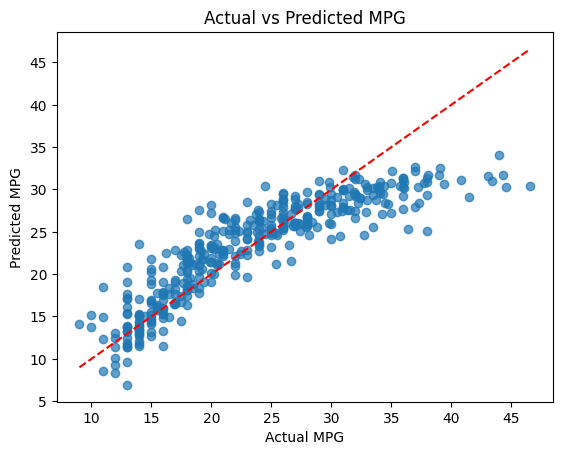

In [10]:
import matplotlib.pyplot as plt

with torch.no_grad():
    predictions = model(X).numpy()

plt.scatter(y.numpy(), predictions, alpha=0.7)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()